## 星等转换为Flux单位

In [89]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from astropy.time import Time 
namelist = ['2003MA3','2010CO1','2010DG77','2010EX11','2010FC81','2010FH81','2010GS7','2010JN71','2010KX7','2010PW58','2010XP69','2019DD2']
for i in range(len(namelist)):
    name = namelist[i]
    rawdata = pd.read_csv(f'table_{name}.csv')
    data = rawdata.loc[:,['mjd','w1mpro','w2mpro','w3mpro','w4mpro']]
    data.insert(loc=len(data.columns),column='date',value='no')
    #data['mjd'] = 2400000.5+data['mjd']
    for i in tqdm(range(len(data))):  
        t = Time(data['mjd'][i],format='mjd',scale='utc')
        t.format = 'iso'
        data['date'][i] = t.value
    data.to_csv(f'{name}.txt',sep='\t',index=False)

  0%|          | 0/15 [00:00<?, ?it/s]/tmp/ipykernel_7561/627851880.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'][i] = t.value
100%|██████████| 15/15 [00:00<00:00, 2811.82it/s]


In [109]:
data[['date','mjd']]

,date,mjd
0,2010-03-03 10:56:44.189,55258.456067
1,2010-03-03 10:56:55.248,55258.456195
2,2010-03-03 12:32:05.251,55258.522283
3,2010-03-03 14:07:26.314,55258.588499
4,2010-03-03 15:42:36.317,55258.654587
5,2010-03-03 18:53:07.382,55258.786891
6,2010-03-03 20:28:28.445,55258.853107
7,2010-03-03 22:03:49.507,55258.919323
8,2010-06-05 07:18:14.976,55352.304340
9,2010-06-05 12:04:07.104,55352.502860


In [106]:

df = pd.read_table('mpc_final_sort.txt')
df = df.loc[:229]
for i in range(len(df)):
    if df['PHA'][i]=='Potentially':
        df['PHA'][i] = 'Yes'
    else:
        df['PHA'][i] = 'No'
df = df.sort_values(by=['PHA','time','Diam'],ascending=False,ignore_index=True)
df.to_excel('PHA.xlsx')

/tmp/ipykernel_7561/1341410745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PHA'][i] = 'No'
/tmp/ipykernel_7561/1341410745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PHA'][i] = 'Yes'


## M2Flux


/tmp/ipykernel_7561/3796483995.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Fc = np.array(Fc)


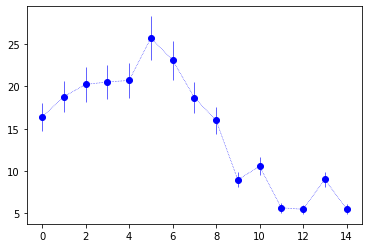

In [124]:
import numpy as np
import matplotlib.pyplot as plt
#-------initial para-------------------------
#Fv0 of W1 ,W2, W3, W4
Fv0 = [-1,306.682,170.663,29.045,8.284]
#Color corrections  Col[Bv=1:8=(100,141,200,283,400,566,800,1131),fc=1:4=(W1,W2,W3,W4)]
Fc0 = np.zeros((1,8))#W1,W2,W3,W4
Fc1 = np.array([-1,17.2062,3.9096,2.6588,1.0032]) #Bv=100
Fc2 = np.array([-1,4.0882,1.9739,1.4002,0.9852])  #Bv=141
Fc3 = np.array([-1,2.0577,1.3448,1.0006,0.9833])  #Bv=200
Fc4 = np.array([-1,1.3917,1.1124,0.8791,0.9865])  #Bv=283
Fc5 = np.array([-1,1.1316,1.0229,0.8622,0.9903])  #Bv=400
Fc6 = np.array([-1,1.0263,0.9919,0.8833,0.9935])  #Bv=566
Fc7 = np.array([-1,0.9884,0.9853,0.9125,0.9958])  #Bv=800
Fc8 = np.array([-1,0.9801,0.9877,0.9386,0.9975])  #Bv=1131
Fc = [Fc0,Fc1,Fc2,Fc3,Fc4,Fc5,Fc6,Fc7,Fc8]
Fc = np.array(Fc)

#-------read file----------------------------
name = namelist[0]
Bv = 4
Const = np.array([-1,Fv0[1]/Fc[Bv][1],Fv0[2]/Fc[Bv][2],Fv0[3]/Fc[Bv][3],Fv0[4]/Fc[Bv][4]])
df = pd.read_table(f'{name}.txt')
#data of W1,W2,W3,W4
dat_w1 = np.array(df['w1mpro'])
#dat_w1= np.hstack([dat_w1,dat_w1*0.1])
dat_w2 = np.array(df['w2mpro'])
#dat_w2= np.hstack([dat_w2,dat_w2*0.1])
dat_w3 = np.array(df['w3mpro'])
#dat_w3= np.hstack([dat_w3,dat_w3*0.1])
dat_w4 = np.array(df['w4mpro'])
#dat_w4= np.hstack([dat_w4,dat_w4*0.1])
#time in MJD
mjd =  np.array(df['mjd'])
#dat w1
dat_fluxw1 = dat_w1
dat_fluxw1 = Const[1]*np.power(10,-dat_w1/2.5)*1000 
#dat w2
dat_fluxw2 = dat_w2
dat_fluxw2 = Const[1]*np.power(10,-dat_w2/2.5)*1000 
#dat w3
dat_fluxw3 = dat_w3
dat_fluxw3 = Const[1]*np.power(10,-dat_w3/2.5)*1000 
#dat w4
dat_fluxw4 = dat_w4
dat_fluxw4 = Const[1]*np.power(10,-dat_w4/2.5)*1000 

'''#dat W1
dat_flux1 = dat_w1
dat_flux1[:,0] = Const[1]*np.power(10,-dat_w1[:,0]/2.5)*1000 
d_dx_dat1  = -1/2.5*Const[1]*np.power(10,-dat_w1[:,0]/2.5)*np.log(10)
dat_flux1[:,1] = d_dx_dat1*dat_flux1[:,1]*1000
#dat W2
dat_flux2 = dat_w1
dat_flux2[:,0] = Const[2]*np.power(10,-dat_w2[:,0]/2.5)*1000 
d_dx_dat2  = -1/2.5*Const[2]*np.power(10,-dat_w2[:,0]/2.5)*np.log(10)
dat_flux2[:,1] = d_dx_dat2*dat_flux2[:,1]*1000
#dat W3
dat_flux3 = dat_w1
dat_flux3[:,0] = Const[3]*np.power(10,-dat_w3[:,0]/2.5)*1000 
d_dx_dat3  = -1/2.5*Const[3]*np.power(10,-dat_w3[:,0]/2.5)*np.log(10)
dat_flux3[:,1] = d_dx_dat3*dat_flux3[:,1]*1000
#dat W4
dat_flux4 = dat_w1
dat_flux4[:,0] = Const[4]*np.power(10,-dat_w4[:,0]/2.5)*1000 
d_dx_dat4  = -1/2.5*Const[4]*np.power(10,-dat_w4[:,0]/2.5)*np.log(10)
dat_flux4[:,1] = d_dx_dat4*dat_flux4[:,1]*1000
'''
np.savetxt(name + '_w3_flux.txt',dat_fluxw3)

x = range(len(dat_fluxw3))
y = dat_fluxw3
plt.plot(x,y,'r.',linewidth=1.2)
plt.errorbar(x,y,fmt="bo:",yerr=y*0.1,linewidth=0.6)
plt.show()